# Amazon product recommendation system 

## Project Motivation :
We want to build a recommendation engine that recommends users of Amazon similar products to one they are currently browsing using text description of all the products.
We are intereseted in answering the following question:
    
Which Amazon products are similar to current product being browsed by the user?

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from ipynb.fs.full.ETL import *
from ipynb.fs.full.Modelling import *

# Data Analysis, Cleaning and Text Preprocessing 

In [2]:
extract_trandform_load = ETL('tops_fashion.json','Pickle/preprocessed_data')
extract_trandform_load.processed()

LOADING DATA...tops_fashion.json

 
The data has 183138 data points and 19 features 

The data after removing irrelevant features has 183138 and it contains these 5 features. The names of the features are ['asin', 'product_type_name', 'formatted_price', 'title', 'medium_image_url'] 
 

DATA ANALYSIS...


The basic statistics for product type on amazon are as follows: 
count     183138
unique        72
top        SHIRT
freq      167794
Name: product_type_name, dtype: object


Product type count:
[('SHIRT', 167794), ('APPAREL', 3549), ('BOOKS_1973_AND_LATER', 3336), ('DRESS', 1584), ('SPORTING_GOODS', 1281), ('SWEATER', 837), ('OUTERWEAR', 796), ('OUTDOOR_RECREATION_PRODUCT', 729), ('ACCESSORY', 636), ('UNDERWEAR', 425)]


The basic statistics for product type on amazon are as follows: 
count                                                183138
unique                                               175985
top       Nakoda Cotton Self Print Straight Kurti For Women
freq                    

# Data Overview

In [2]:
#loading the preprocessed and cleaned data from Pickle folder
data = pd.read_pickle('Pickle/preprocessed_data')
data.head()

,asin,product_type_name,formatted_price,title,medium_image_url
4,B004GSI2OS,SHIRT,$26.26,featherlite ladies long sleeve stain resistant...,https://images-na.ssl-images-amazon.com/images...
6,B012YX2ZPI,SHIRT,$9.99,womens unique 100 cotton special olympics wor...,https://images-na.ssl-images-amazon.com/images...
11,B001LOUGE4,SHIRT,$11.99,ladies cotton tank 2x1 ribbed tank top,https://images-na.ssl-images-amazon.com/images...
15,B003BSRPB0,SHIRT,$20.54,featherlite ladies moisture free mesh sport sh...,https://images-na.ssl-images-amazon.com/images...
21,B014ICEDNA,SHIRT,$7.50,supernatural chibis sam dean castiel short sle...,https://images-na.ssl-images-amazon.com/images...


# Text based product similarity results

## Bag of words Vectorization based model

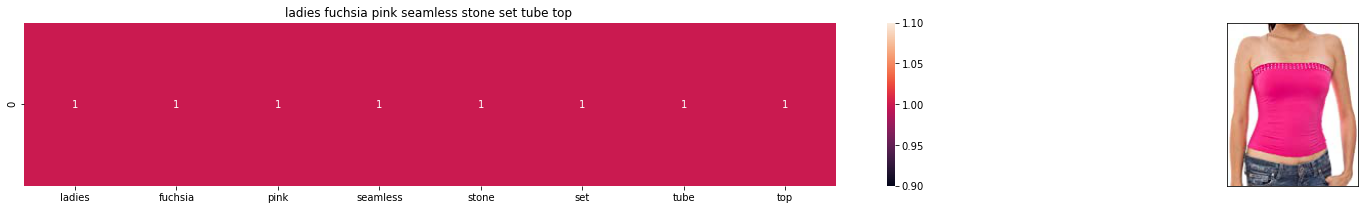

The amazon ID of the apparel is B0079QXJ3S


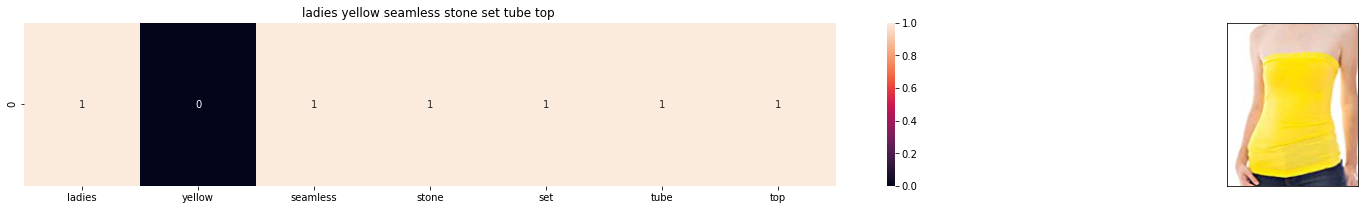

The amazon ID of the apparel is B00D01CGU8


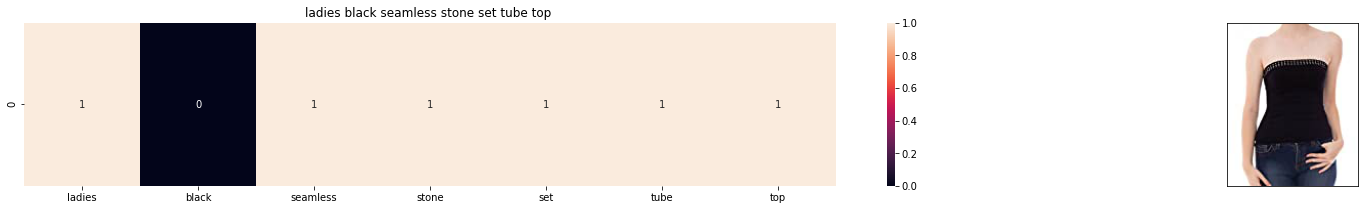

The amazon ID of the apparel is B0058K6RVS


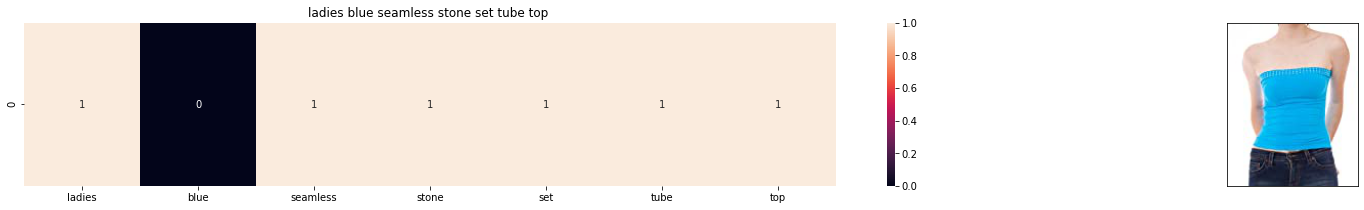

The amazon ID of the apparel is B0060Q7E0W


In [17]:
#doc_id , vectorization method = bag_of_words, cut_off = no. of recommendations
final = results(13,'bag_of_words',4)
final.distance_similarity()

# TfidfVectorization based model

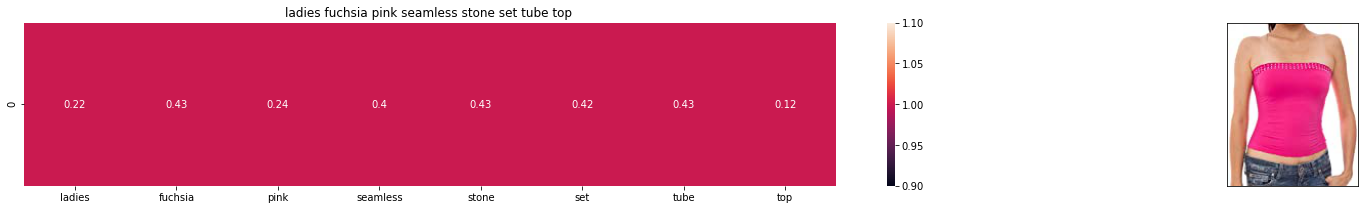

The amazon ID of the apparel is B0079QXJ3S


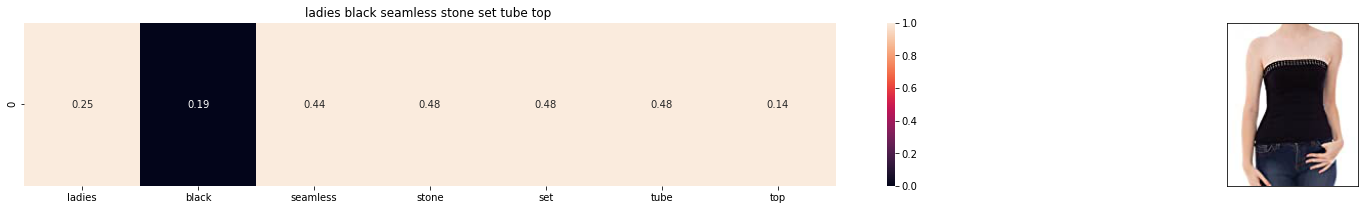

The amazon ID of the apparel is B0058K6RVS


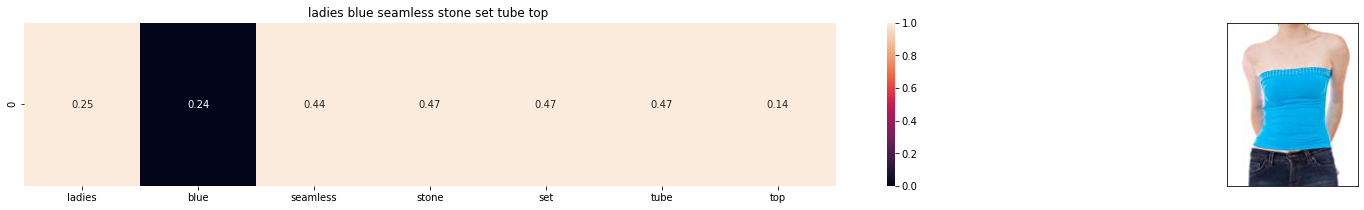

The amazon ID of the apparel is B0060Q7E0W


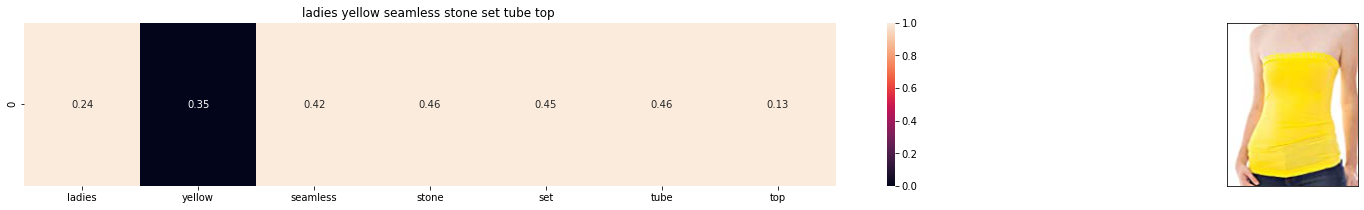

The amazon ID of the apparel is B00D01CGU8


In [16]:
final = results(13,'Tfidf',data,4)
final.distance_similarity()

# IdfVectorization based model

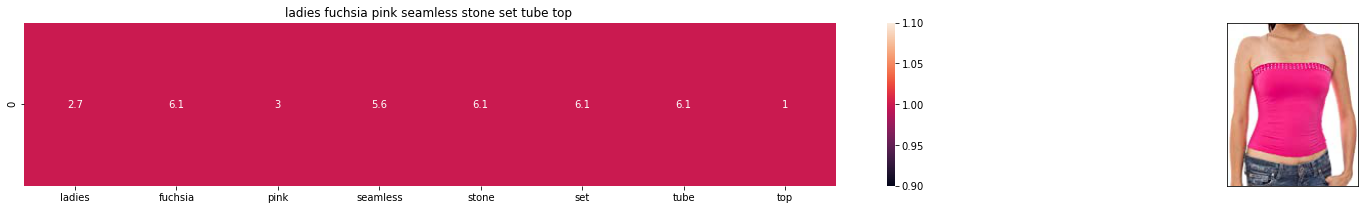

The amazon ID of the apparel is B0079QXJ3S


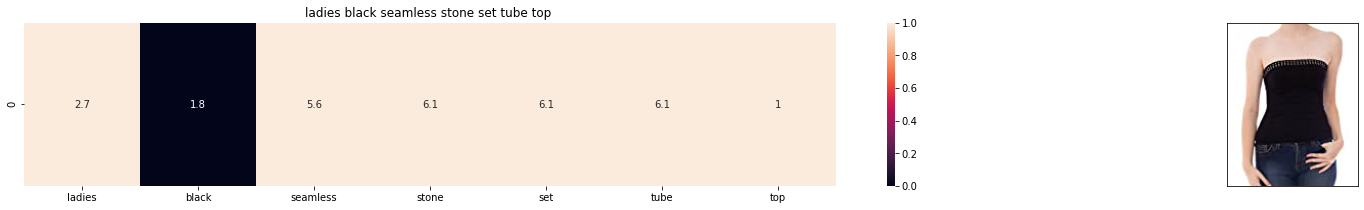

The amazon ID of the apparel is B0058K6RVS


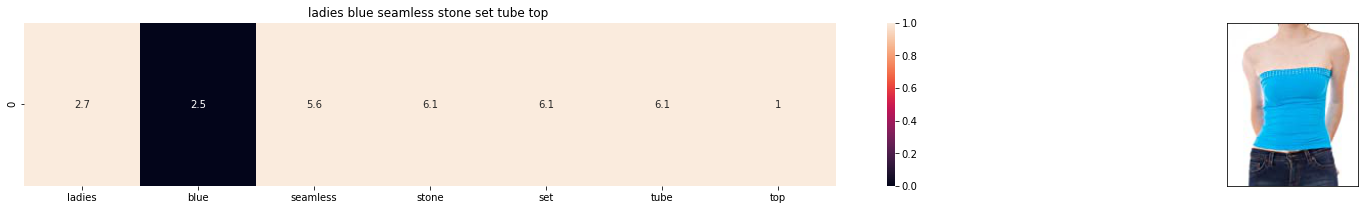

The amazon ID of the apparel is B0060Q7E0W


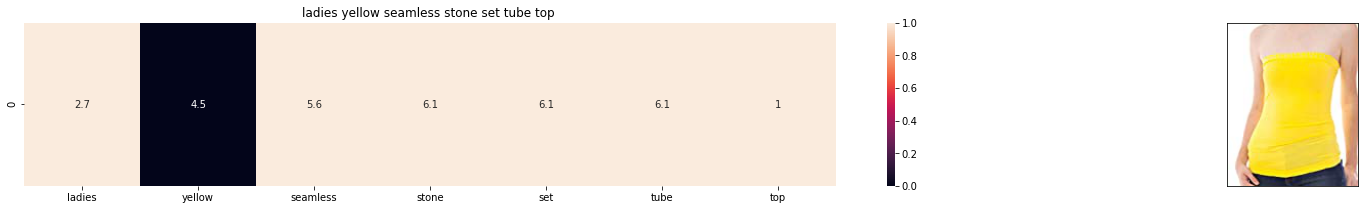

The amazon ID of the apparel is B00D01CGU8


In [18]:
final = results(13,'idf',4)
final.distance_similarity()

# Semantic meaning based apparel similarity models

# Avg Word2Vec

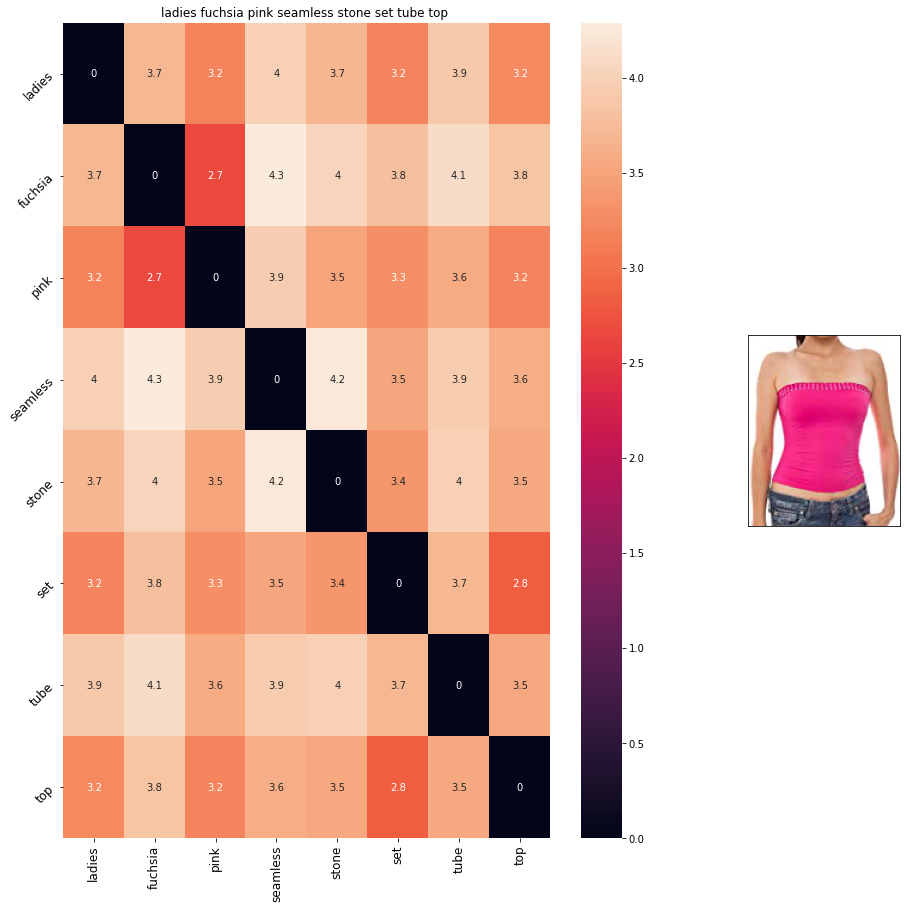

The amazon ID of the apparel is B0079QXJ3S


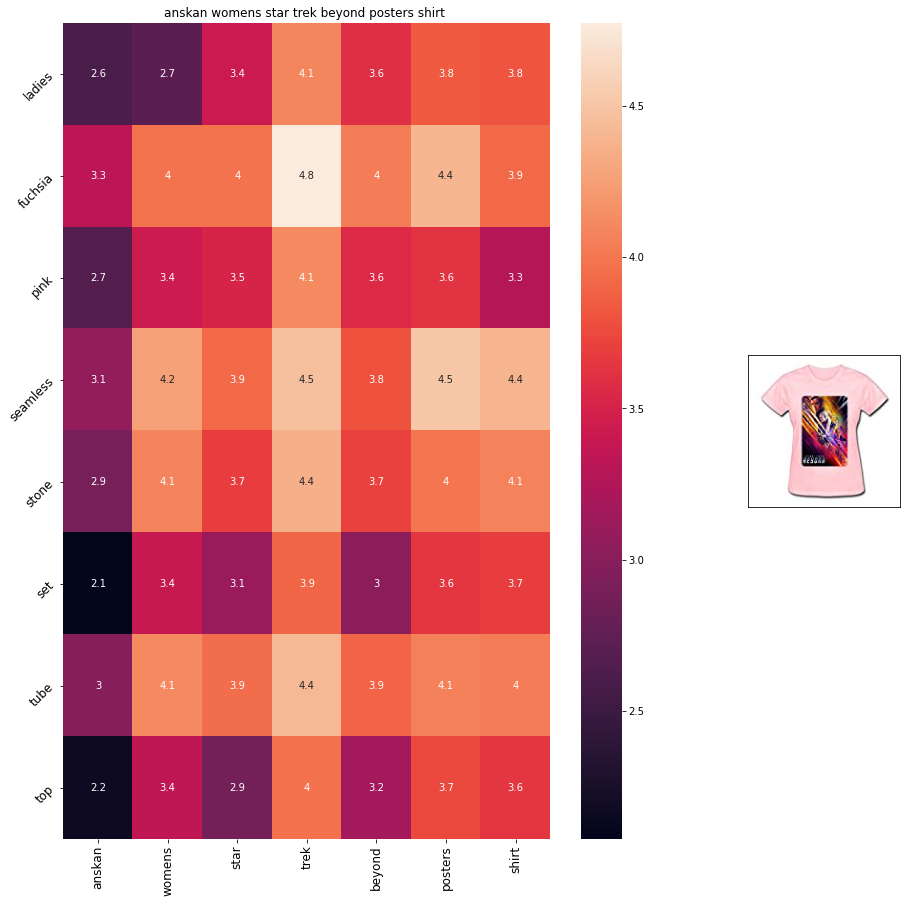

The amazon ID of the apparel is B01HPVZEMU


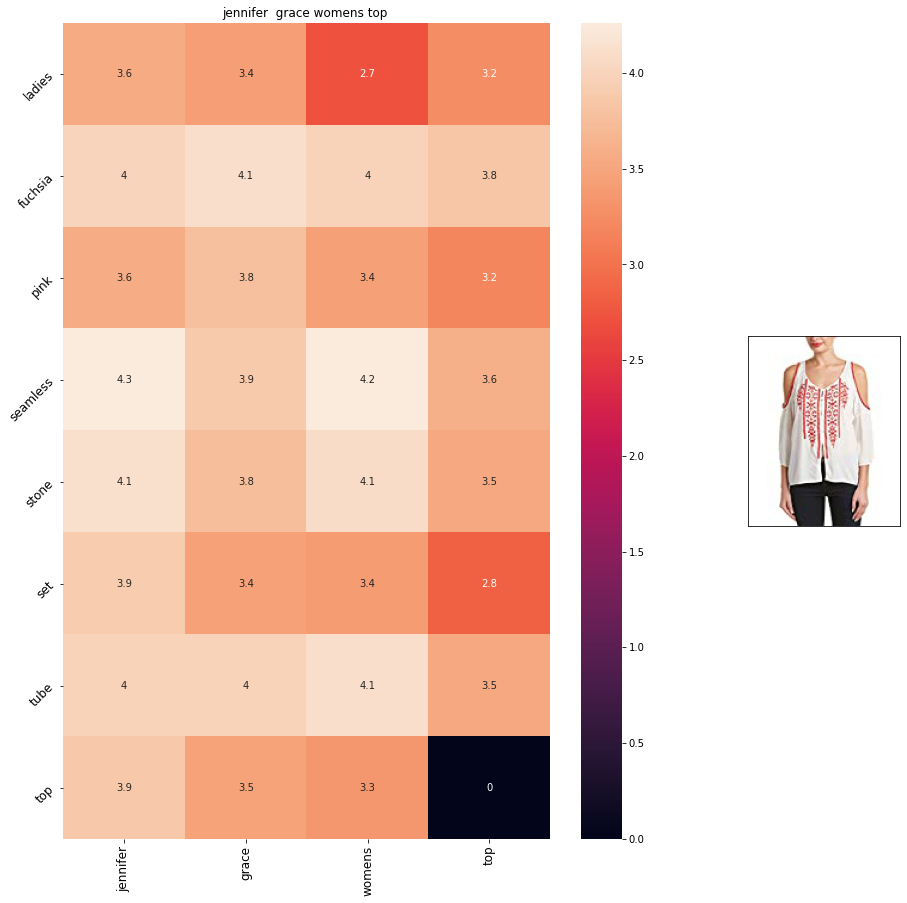

The amazon ID of the apparel is B06XT7PYBC


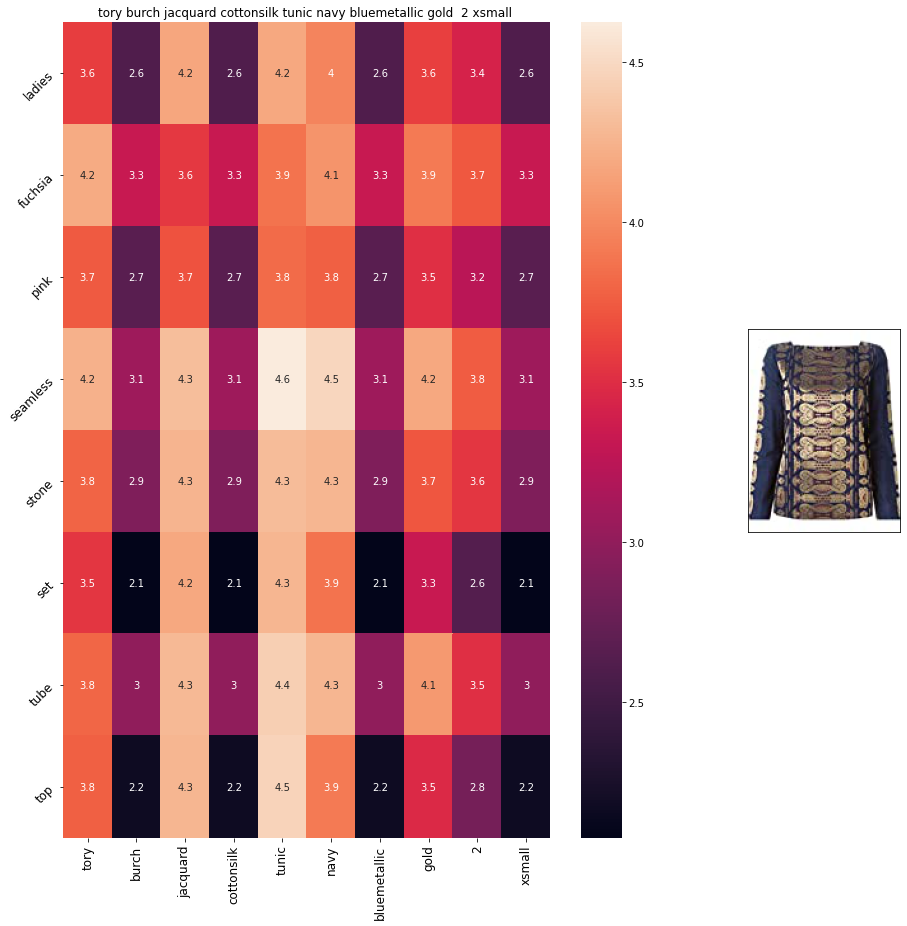

The amazon ID of the apparel is B06WD7N2KT


In [19]:
#Storing the vectorization array as a .npz file because performing Avg Word2Vec vectorization each time is computationally expensive for Word2Vec
final = results(13,'avg',4)
final.distance_similarity()

# Weighted Word2Vec

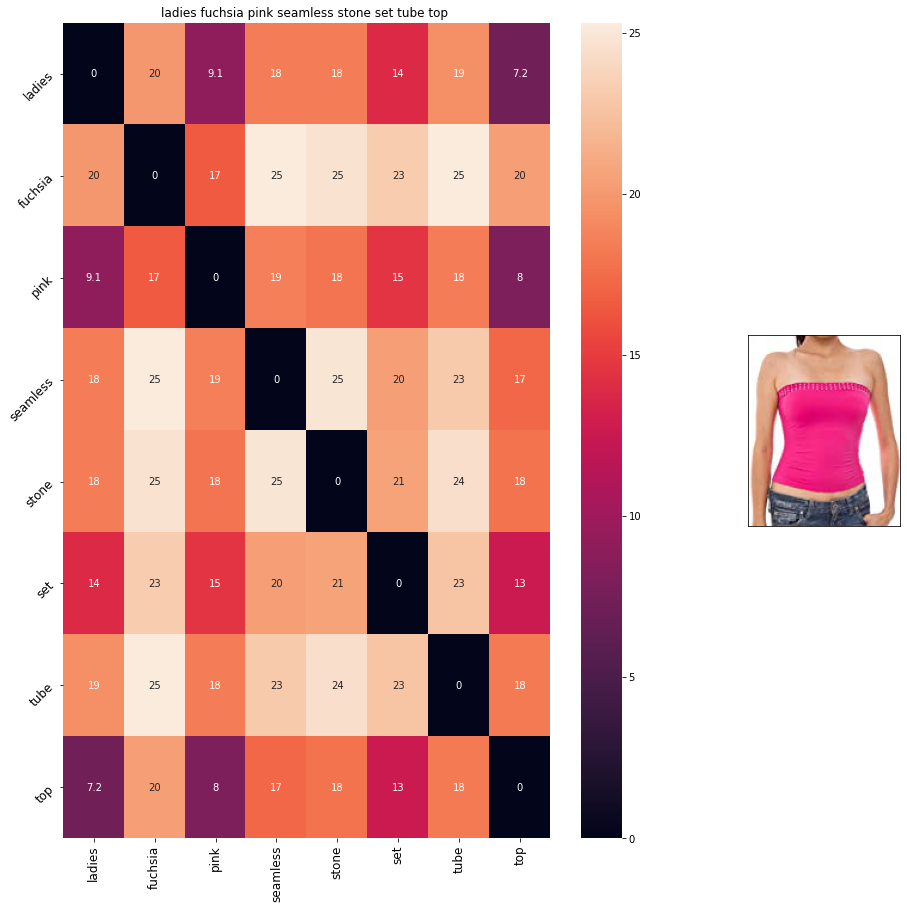

The amazon ID of the apparel is B0079QXJ3S


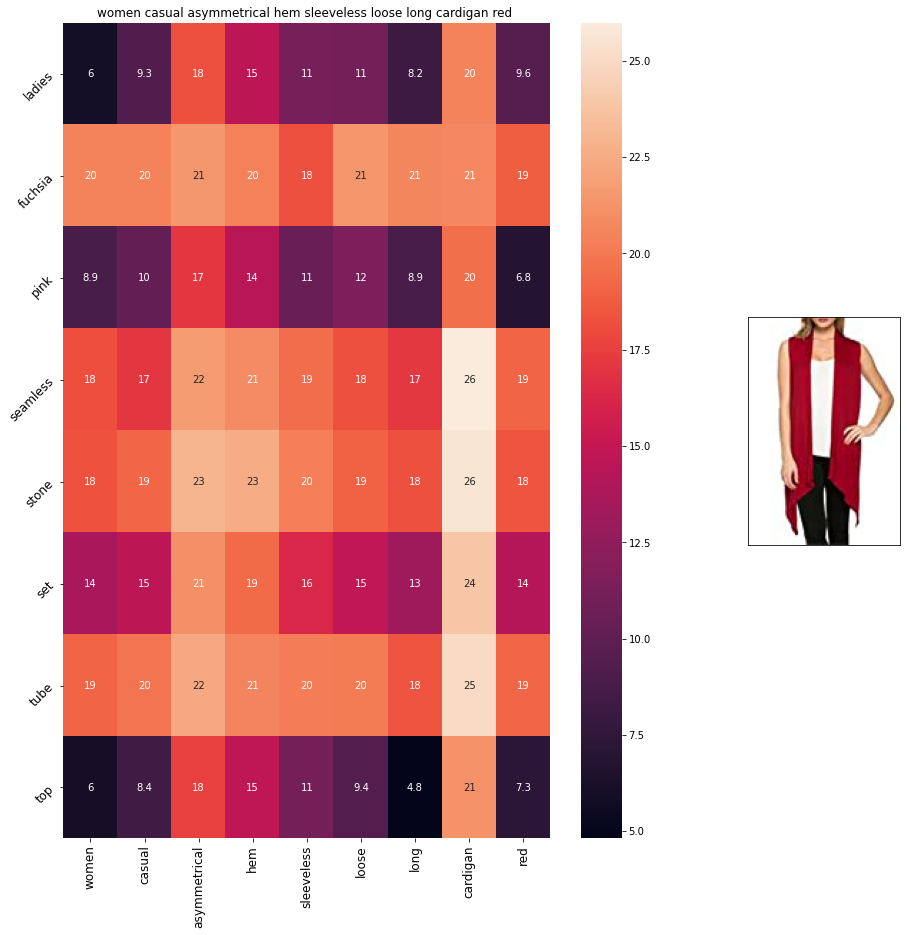

The amazon ID of the apparel is B019V3ML58


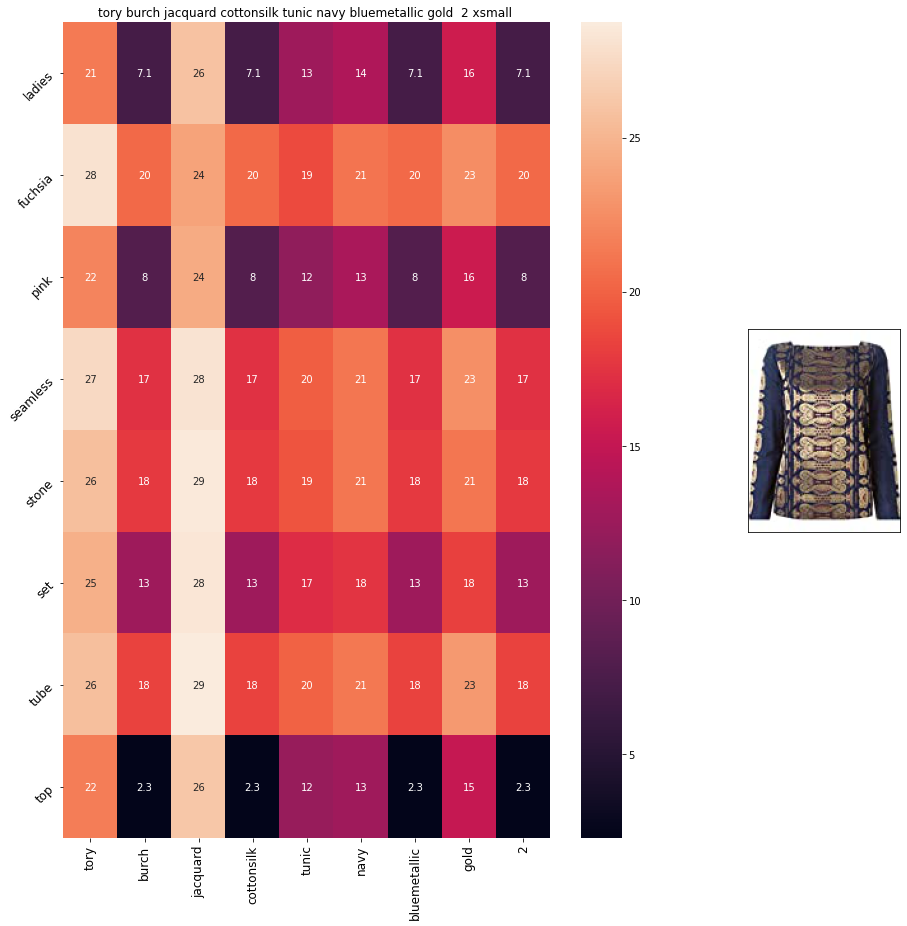

The amazon ID of the apparel is B06WD7N2KT


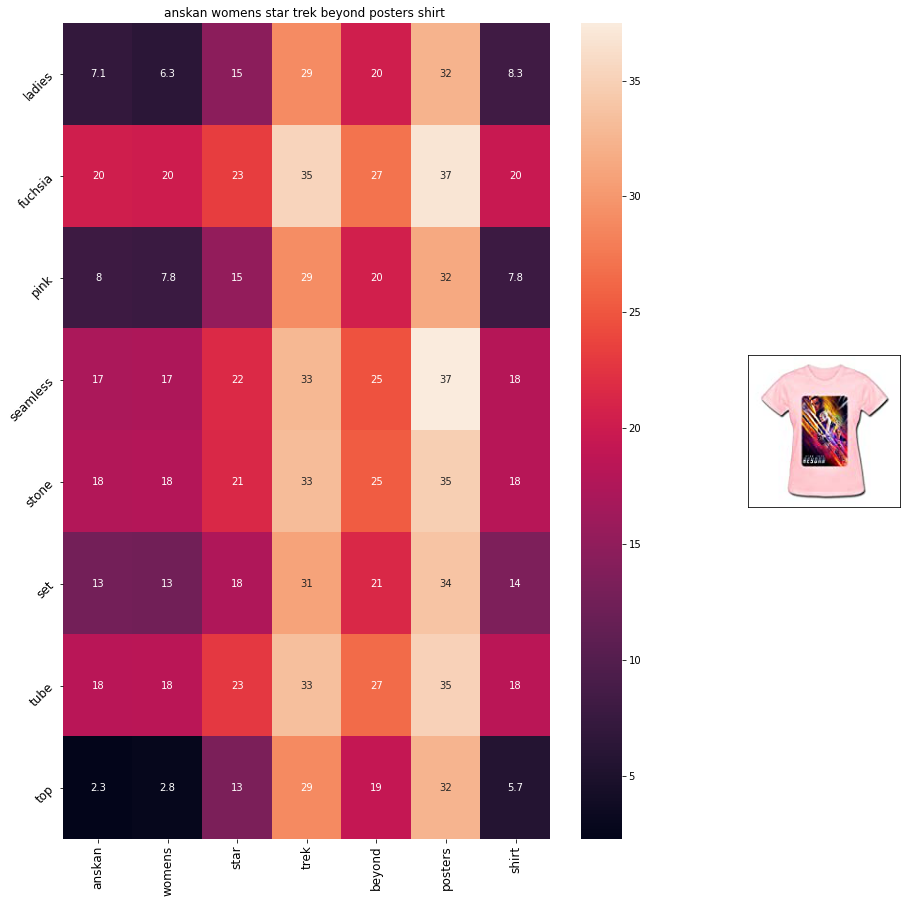

The amazon ID of the apparel is B01HPVZEMU


In [20]:
#Storing the weighted Word2Vec vectorization array as a .npz file because performing Word2Vec vectorization each time is computationally expensive for Word2Vec
#Storing the vectorization array as a sparse matrix numpy array .npz file because performing idf vectorization each time is computationally expensive for Word2Vec
final = results(13,'weighted',4)
final.distance_similarity()

# Reflection:


The purpose of the project is to make an product recommendation engine for Amazon. We are given simulated data that gives us various characteristics of the products on amazon. The recommendations are to be made based on these characteristics of the products and hence, we are building a content based fliter recommendation system. 

#### Text preprocessing :

After initial data analysis and data cleaning, we build our model using the 'title' feature which describes the various characteristices of the products in the form of strings. At first we need to preprocess the string of words that come under title feature inorder to use them to build vectors. These vector representation of strings are used to build a distance based similarity recommendation system. The steps of preprocessing are as follows:

1. First we make words in strings lower case in order to make the computer understand 'Amazon' and 'amazon' are the same words as the computer does not really understand the semantic meaning of words. 

2. We use Natural language processing toolkit to remove stopwords from our 'title' strings. Stopwords are most commonly used words present in every sentence like 'they' , 'hey', 'he' etc which do not add much to the semantic meaning of the sentences.  

3. We use Natural language processing to perform stemming  on our 'title' string. Stemming is a technique to reduce a base to its base form for example 'argument' becomes argu. The base form does not need to have any semantic meaning. Stemming did not work very well in our case hence we did not apply it.



#### Methods of sentence to vector conversion:

Now data['title'] is ready to be converted into vector form. These are methods of creating vector form for our string of words. They are as follows:

1. Bag of words:  Using CountVectorizer from sklearn we can convert a string of words to vectors. The CountVectorizer forms an array with features(columns) as words from the corpus of words from the input data and sentences as data points(rows). If the word exists in the sentence the feature value for that sentence becomes else 0. This method ends up creating a vector of 1's and 0's with dimensions equal to the number of words(feature) in our input text corpus. All vector representation of sentences are usually sparse arrays as they have very few words compared to the entire corpus of words.

2. Tfidf : Using TfidfVectorizer from sklearn we can convert a string of words to a vector. The TfidfVectorizer forms an array with features(columns) as words from the corpus of words present in the input text data and sentences as data points(rows). If a word exists in a sentence the Tfidf value for that feature in the sentence(data point) is term frequency of the word in that sentence multiplied by inverse document frequency. Term frequency (TF) is the number of times a word(feature) occurs in a sentence(data point) divided by the total number of words present in that sentence. If the word occurs more than once in a statement it has more term frequency/weightage. This makes sense as a higher weightage/magnitude of a feature in a vector will signify the higher importance of that word in the sentence. Inverse document frequency (IDF) is the log value of the total number of documents(sentences) in the input data divided by the number of documents(sentences) in which the feature(word) occurs. As log is an increasing function, the Inverse document log will have a higher value when the number of sentences in which the word(feature) occurs will be low (denominator), thus making the resulting IDF value(result of division) high. As the word occurs in less number of sentences(data points) as compared to commonly occurring words in sentences. It makes sense as we give more weightage/importance to a word occurring only in a few sentences as compared to a word commonly occurring in sentences, as this word might play a more important role in the meaning of the sentence.

3. IDF : We build an IdfVectorizer function in order to convert our sentence to a vector. IdfVectorizer forms an array with features(columns) as words from the corpus of words present in the text data and sentences as data points(rows). The Idf value is calculated in the same way as mentioned in the TfidfVectorizer model above. We only assign Idf value to the cells and ignore the TF values to avoid the bias of Termfrequency values towards sentences with less number of words present in them. The lower the number of words occurring in a statement the higher will the be term frequency value for a word because the denominator(total no of words in our sentence) will be lower(please refer to Tfidf description for formula).

4. Avg Word2Vec : We use Google's word2vec library which has vector representation of 3 million words in it. This library was created using neural network models to learn word association from a large corpus of texts. Each word has 300 dimension vector representation. The words having similar semantic meaning are assigned similar vector representation by the model. We make a function which gives us the vector representation of our sentences(data points) by adding all the vector representing the words in our sentence and dividing the resulting vector by the number of words in the sentence. The resulting 300 dimensions vector formed is an average vector representation of all the word in our sentence. This method is called as an Avg Word2Vec.

5. Weighted Word2Vec : We use google's word2vec library which has vector representation of 3 million words in it. This library was created using neural network models to learn word association from a large corpus of texts. Each vector (word) has 300 dimensions. The words having similar semantic meaning  are assigned similar vector representation by using a neural network model bascially placing them close to each other in a N(300) dimension space representation.



#### Distance based similarity (Cosine) :

Cosine distance is the measure of the angle between between two vectors in an N-dimensional space. N in our case is the number of features or the number of words present in our corpus of words formed from all the sentences in our data.
In distance based similarity recommendations, we use Cosine distance as a metric for distance measure when the magnitude of the vectors does not matter. Let us understand this with an example, suppose we are working with text data represented by word counts. We make an assumption that when a word for example 'physics' occurs more frequently in a given sentence 1 than it does in a given sentence 2, the magnitude of the vector tells us that sentence 1 is more similar to the topic of physics. However, it could be the case that we are working with sentences of unequal lengths. Physics probably occurred more in sentence 1 because the sentence is longer as compared to sentence 2. Cosine similarity corrects this bias. Text data is the most typical example for when to use this metric, you would want to apply cosine similarity for cases where the features weights might be larger without meaning anything different. If we would use Euclidean distance instead of Cosine distance the magnitude of the distance between the vectors of sentence 1 and sentence 2 would make it seem they are far apart. This is the case because Euclidean distance is affected by the magnitude of the vector.

To summarize if we plot in an N-dimensional space, where each dimension represents a word in the sentence, the cosine similarity captures the the angle between the sentences(vectors) and not the magnitude of distance between them. If we need the magnitude, we should compute the Euclidean distance instead.

#### Distance based similarity (Euclidean) :

In case of average Word2Vec model each word is assigned a 300 dimension vector based on its semantic meaning. The words are preassigned these vectors and features by Google and have nothing to do with the word corpus of our sentences unlike the other vectorization methods. As the vector cell magnitude does not represent the presence of a word in a sentence, the magnitude of the vector will matter in case of average word2vec. It makes more sense to use Euclidean distance instead of Cosine distance to make distance based similarity recommendations when magnitude of the vector plays a role in measuring distance between the vectors (refer to the Cosine distance description above).

# Conclusion & Improvements:

1. We are still getting same products as recommendation even after removing products with duplicate descriptions, this happens because of different words used in description of similar products. Inorder to remove these duplicates we can use image processing techniques on downloaded images of products and remove the duplicate images.

2. Word2Vec vectorization does not work well in our case because of the null vectors assigned to unique words not present in the Google's word to vec dictionary such as specific brand names, unique product nitty-gritties etc. In order to make Word2Vec vectorization give more relevant results we will need to make our own Word2Vec dictionary using the corpus of words present in the relevant features of the dataset we model. 

3. Seeing our results we cannot determine which vectorization model is giving us better results amongst bag of words, Tfidf and idf vectorized models. To find out which model is better we would have to first live test our recommendation models. We would divide our customers into random test groups of equal sizes and live test a model on each group. Second step would be to collect various response parameters or business parameters such as purchase conversion rate of recommendations, recommendation selection rate etc. Third step would be to perform multivariate A/B testing using these parameters after collecting sufficiently large data to select the best performing model.
 